# E-Commerce Prediction Project

## Problem Statement:


## Data Description:
The dataset contains 500 records with 8 features (email, address,avtar,avg session length,time on app,time on website,length of membership,yearly amount spent)
yearly amount spent by the customer is the target variable (independent column).



### Import Libraries 

In [1]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\Ecommerce_Customers.csv")
df

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


## Exploratory Data Analysis 

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

#Steps involved in EDA

1.Describing the data

2.Data cleaning

3.Imputation techniques

4.Data analysis and visualization

5.Transformations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.tail()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,"49791 Rachel Heights Apt. 898East Drewborough,...",DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [6]:
#statistical analysis 
df.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
#check datatypes of each columns
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg Session Length      float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [8]:
#check missing/null values
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

conclusion: Their are no any missing values in dataset.

In [9]:
#duplicated records 
df.duplicated().sum()

0

conclusion: Here are not any duplicated records presented in dataset.

### Data Visualization 

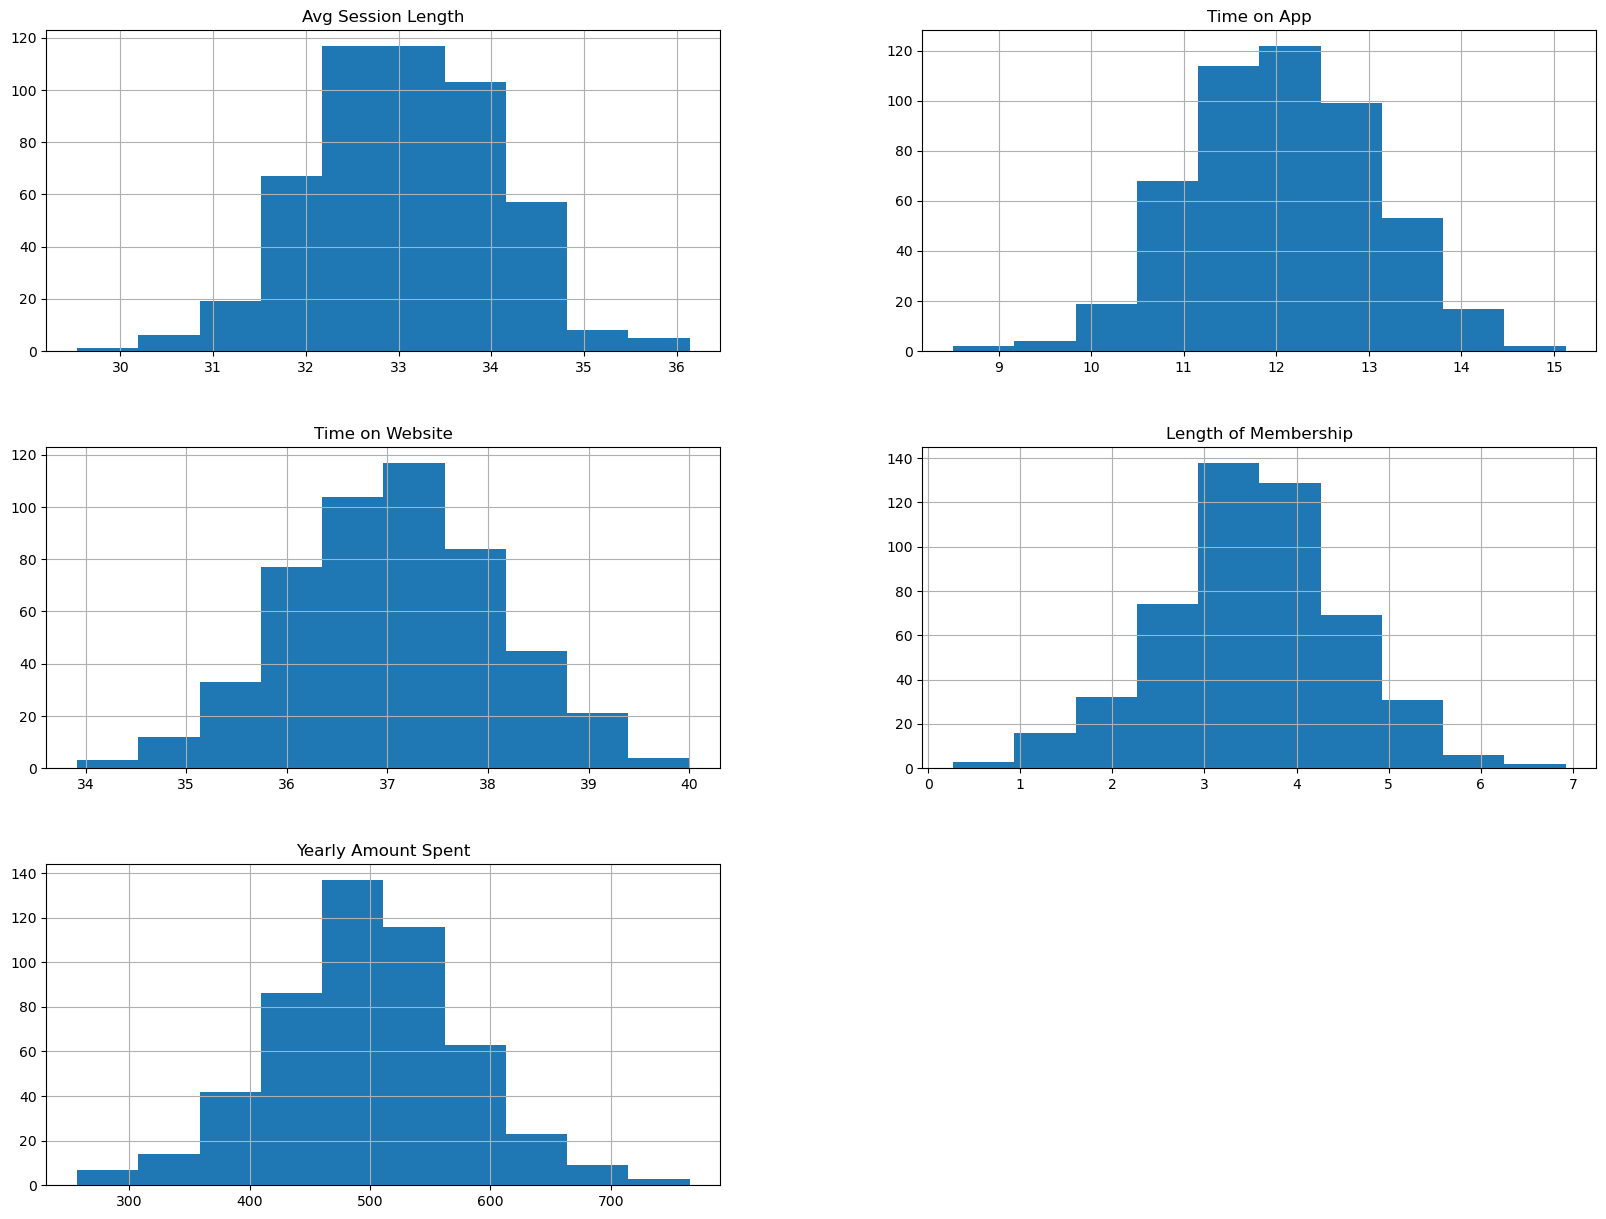

In [10]:

# Histogram
df.hist(bins=10, figsize=(20, 15))
plt.show()


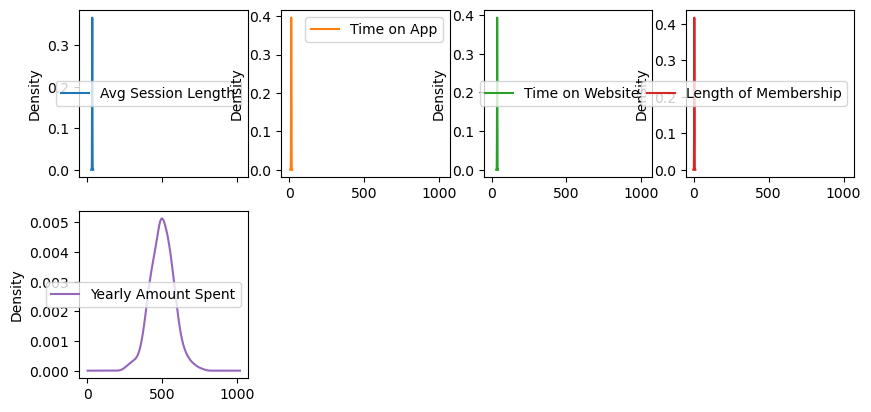

In [11]:
# Density Plot
df.plot(kind='density', subplots=True, layout=(4,4), figsize=(10,10))
plt.show()


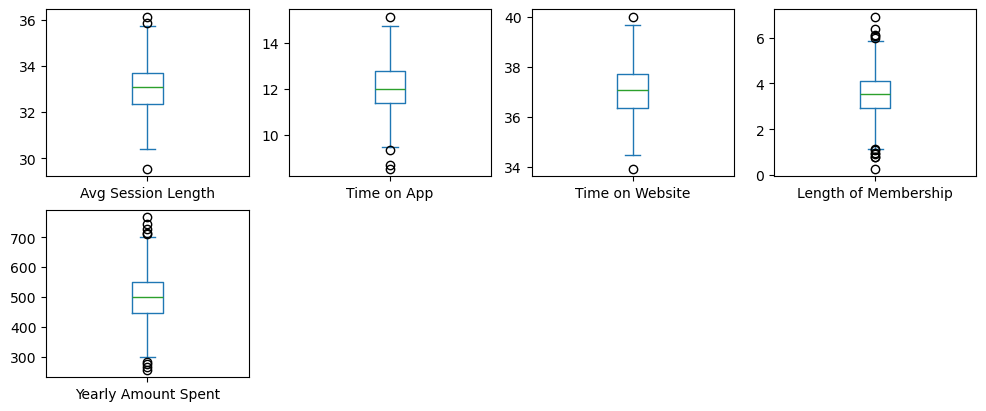

In [13]:

#boxplot
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,10))
plt.show()




Conclusion:here we can observe this in boxplot there are large number of outliers in Avg Session Length,Time on app, Tength of membership,yearly amount spent,So treating them may cause error in the model building ,so treate the remaining columns and keep these columns without change and build the model if the outliersinfluncing the model accuracy then treate them.



### Handling the Outliers

In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
# treating the outliers in LB column

def HandleOutliers(column,df):
    q1 = df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_boundry=q1-1.5*iqr
    upper_boundry = q3+1.5*iqr
    for value in df[column]:
        if value > upper_boundry:
            df[column].replace(value,upper_boundry,inplace=True)
        elif value<lower_boundry:
            df[column].replace(value,lower_boundry,inplace=True)
        else:
            pass


columns =["Avg Session Length","Time on Website","Time on App","Length of Membership","Yearly Amount Spent"]

for column in columns:
    HandleOutliers(column,df)

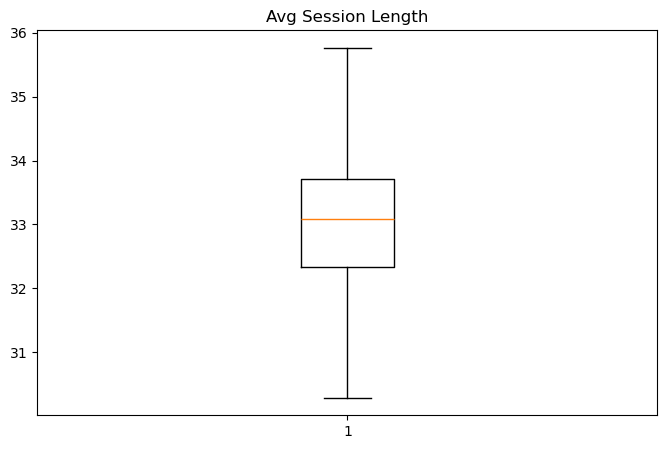

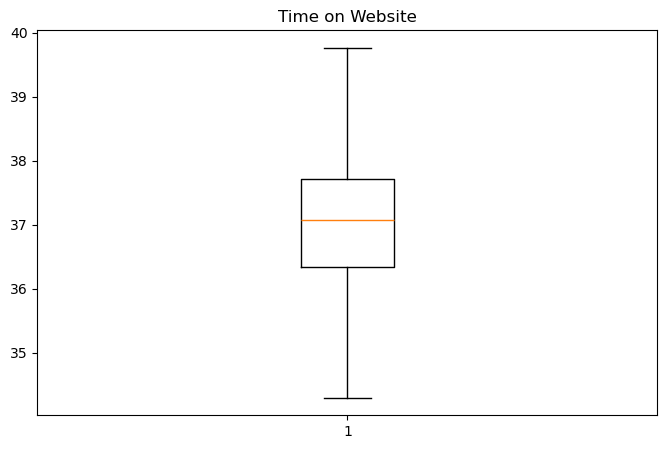

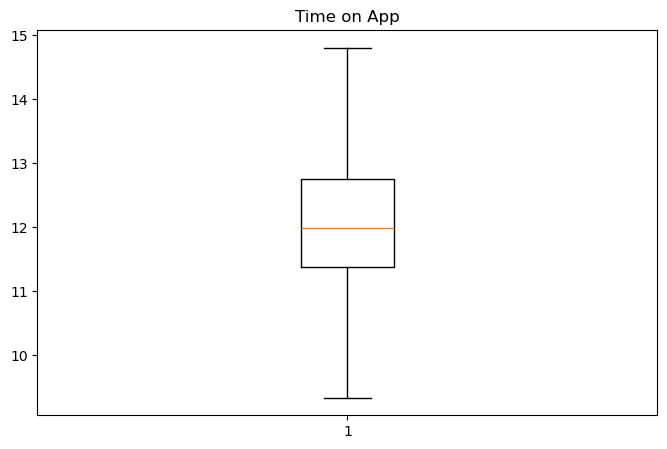

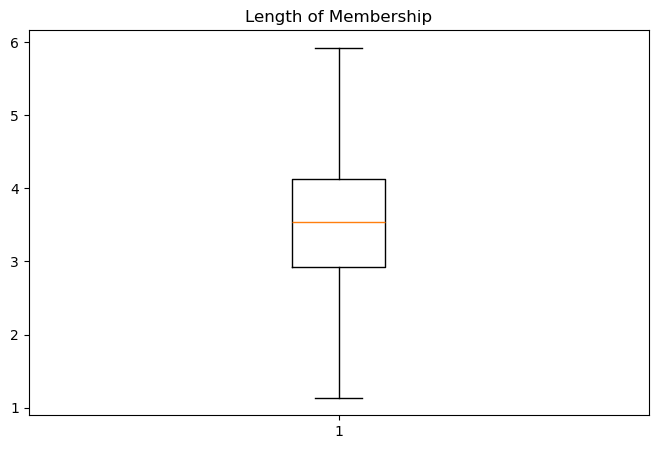

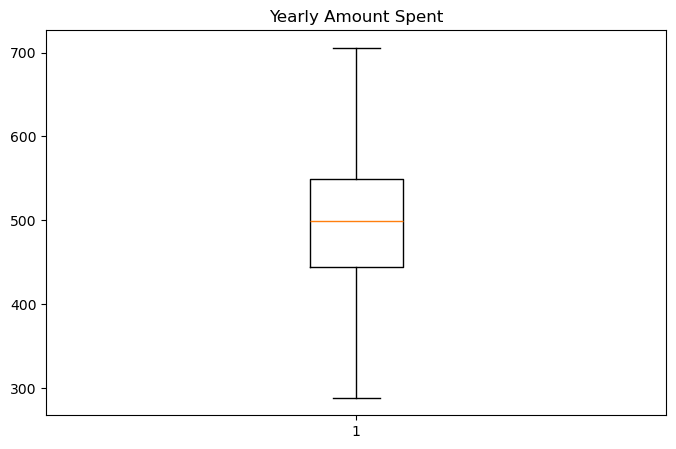

In [14]:
for column in columns:
    figure=plt.figure(figsize=(8,5))
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

# hence outlier are Handled for the possible columns.

### Scatterplot

In [15]:
df.head(2)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


<Axes: xlabel='Avg Session Length', ylabel='Yearly Amount Spent'>

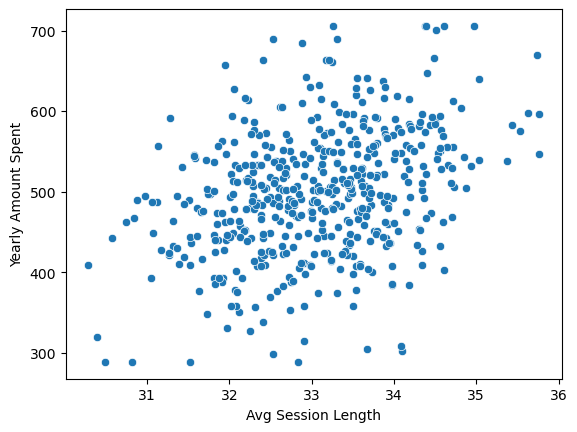

In [16]:
sns.scatterplot(x = df['Avg Session Length'], y = df['Yearly Amount Spent'])

<Axes: xlabel='Avg Session Length', ylabel='Time on App'>

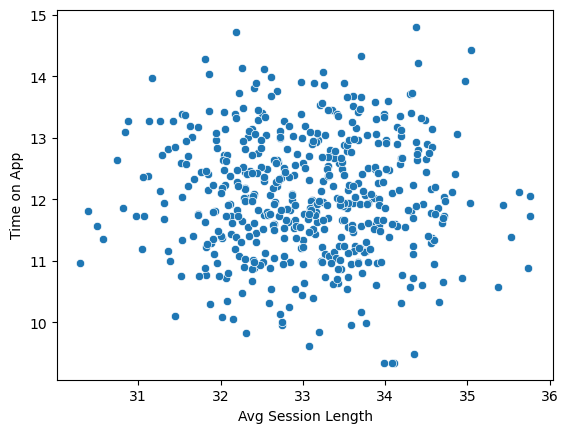

In [17]:
sns.scatterplot(x = df['Avg Session Length'],y = df['Time on App'])

<Axes: xlabel='Time on Website', ylabel='Time on App'>

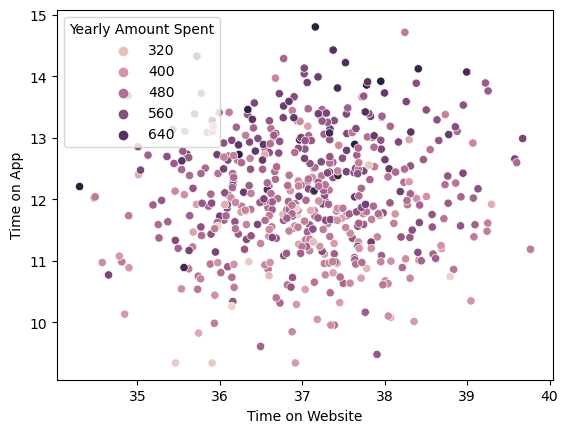

In [17]:
sns.scatterplot(x = df['Time on Website'],y = df['Time on App'], hue = df['Yearly Amount Spent'])

<Axes: xlabel='Avg Session Length', ylabel='Length of Membership'>

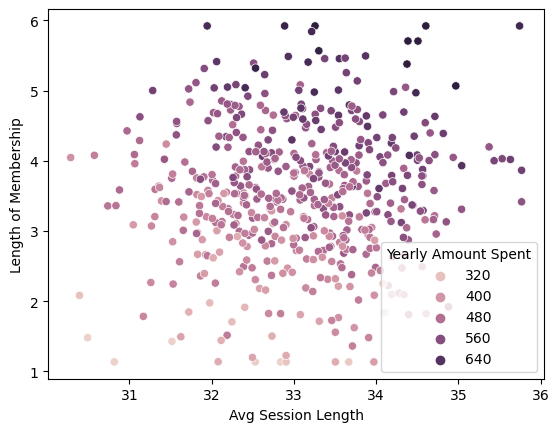

In [18]:
sns.scatterplot(x = df['Avg Session Length'],y = df['Length of Membership'], hue = df['Yearly Amount Spent'])

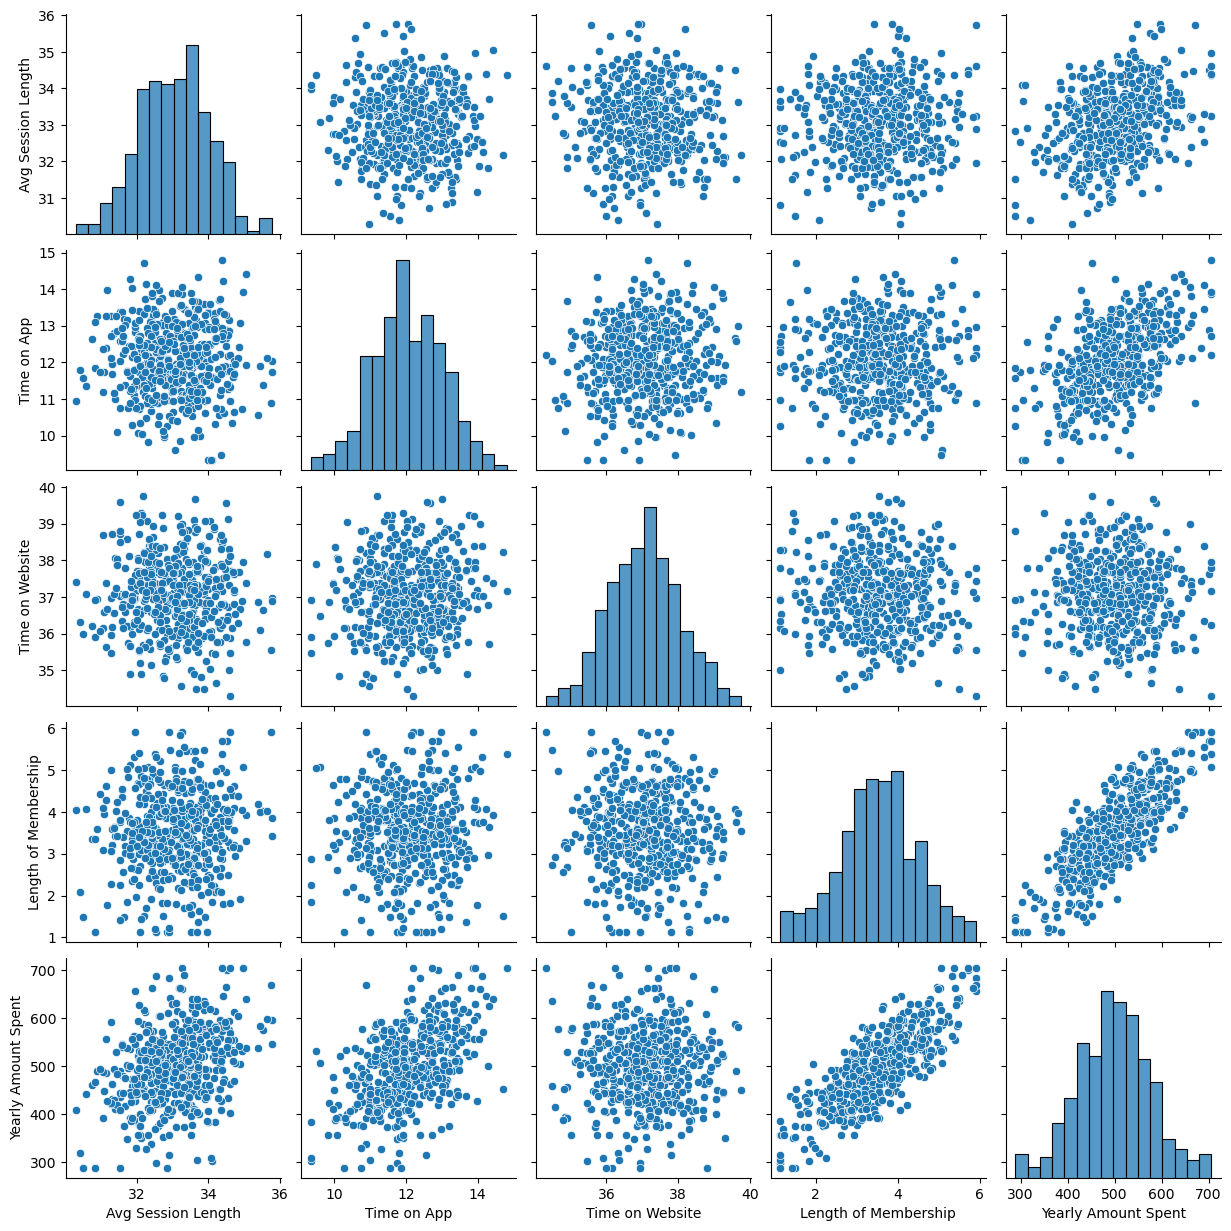

In [19]:

#Pairplot
sns.pairplot(df)


### Transformation using label encoding 

In [20]:
df.head(2)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [21]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Email'] = le.fit_transform(df['Email'])

df['Address'] = le.fit_transform(df['Address'])

df['Avatar'] = le.fit_transform(df['Avatar'])


### Feature Scaling using standardization

In [22]:

#Standardization
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()

sc.fit_transform(df)


array([[ 0.64086008,  0.91106055,  1.54362033, ...,  2.50219694,
         0.56181113,  1.13662977],
       [-0.41222892, -0.1628131 , -1.06714369, ...,  0.20700135,
        -0.88990136, -1.37041267],
       [ 0.7309269 , -0.87641946, -1.5307373 , ...,  0.04956686,
         0.58424563, -0.14930099],
       ...,
       [-1.00805559, -1.4583897 , -1.23794134, ...,  1.26439314,
         1.45790252,  0.67131721],
       [-1.0149838 ,  0.53000861,  1.44602167, ..., -0.21936146,
        -1.22509963, -0.54733622],
       [-0.42608535, -0.03810519, -1.01834437, ..., -1.28217342,
        -0.8171151 , -0.01826445]])

In [23]:
x = sc.fit_transform(df)
x

array([[ 0.64086008,  0.91106055,  1.54362033, ...,  2.50219694,
         0.56181113,  1.13662977],
       [-0.41222892, -0.1628131 , -1.06714369, ...,  0.20700135,
        -0.88990136, -1.37041267],
       [ 0.7309269 , -0.87641946, -1.5307373 , ...,  0.04956686,
         0.58424563, -0.14930099],
       ...,
       [-1.00805559, -1.4583897 , -1.23794134, ...,  1.26439314,
         1.45790252,  0.67131721],
       [-1.0149838 ,  0.53000861,  1.44602167, ..., -0.21936146,
        -1.22509963, -0.54733622],
       [-0.42608535, -0.03810519, -1.01834437, ..., -1.28217342,
        -0.8171151 , -0.01826445]])

In [23]:
pd.DataFrame(x, columns=df.columns)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0.640860,0.911061,1.543620,1.466874,0.611921,2.502197,0.561811,1.136630
1,-0.412229,-0.162813,-1.067144,-1.145759,-0.962993,0.207001,-0.889901,-1.370413
2,0.730927,-0.876419,-1.530737,-0.053712,-0.738074,0.049567,0.584246,-0.149301
3,0.980343,-1.299041,1.104426,1.272058,1.693510,-0.337469,-0.423105,1.058520
4,0.633932,-1.312897,0.274838,0.281386,0.754050,0.473129,0.933991,1.283342
...,...,...,...,...,...,...,...,...
495,0.287521,-0.211311,1.421622,0.186867,1.539344,-0.638992,0.217916,0.955996
496,0.086603,-1.146620,0.860430,1.675460,-0.365827,0.128771,0.043898,0.382235
497,-1.008056,-1.458390,-1.237941,-0.413586,-0.565801,1.264393,1.457903,0.671317
498,-1.014984,0.530009,1.446022,0.273082,0.342784,-0.219361,-1.225100,-0.547336


In [24]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [25]:
scaled_data = pd.DataFrame(x, columns=df.columns)
scaled_data

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0.640860,0.911061,1.543620,1.466874,0.611921,2.502197,0.561811,1.136630
1,-0.412229,-0.162813,-1.067144,-1.145759,-0.962993,0.207001,-0.889901,-1.370413
2,0.730927,-0.876419,-1.530737,-0.053712,-0.738074,0.049567,0.584246,-0.149301
3,0.980343,-1.299041,1.104426,1.272058,1.693510,-0.337469,-0.423105,1.058520
4,0.633932,-1.312897,0.274838,0.281386,0.754050,0.473129,0.933991,1.283342
...,...,...,...,...,...,...,...,...
495,0.287521,-0.211311,1.421622,0.186867,1.539344,-0.638992,0.217916,0.955996
496,0.086603,-1.146620,0.860430,1.675460,-0.365827,0.128771,0.043898,0.382235
497,-1.008056,-1.458390,-1.237941,-0.413586,-0.565801,1.264393,1.457903,0.671317
498,-1.014984,0.530009,1.446022,0.273082,0.342784,-0.219361,-1.225100,-0.547336


In [26]:
scaled_data.describe()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,0.000000,0.000000,-1.030287e-16,2.231104e-15,-7.034373e-16,-7.460699e-16,6.394885e-17,6.608047e-16
std,1.001002,1.001002,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.728590,-1.728590,-1.677135e+00,-2.812008e+00,-2.765724e+00,-2.746076e+00,-2.453237e+00,-2.697026e+00
25%,-0.864295,-0.864295,-8.780463e-01,-7.234790e-01,-6.791235e-01,-7.073169e-01,-6.172646e-01,-6.937431e-01
50%,0.000000,0.000000,1.864134e-02,2.869396e-02,-7.299078e-02,8.577339e-03,3.538349e-04,-4.057806e-03
75%,0.864295,0.864295,9.092291e-01,6.688739e-01,7.119435e-01,6.518556e-01,6.067171e-01,6.417788e-01
max,1.728590,1.728590,1.665619e+00,2.757403e+00,2.798544e+00,2.690614e+00,2.442690e+00,2.645062e+00


In [27]:

mn = MinMaxScaler()

minmax_scaled = pd.DataFrame(mn.fit_transform(df), columns=df.columns)
minmax_scaled


,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0.685371,0.763527,0.963504,0.768283,0.607024,0.965343,0.615828,0.717633
1,0.380762,0.452906,0.182482,0.299179,0.323983,0.543176,0.319314,0.248332
2,0.711423,0.246493,0.043796,0.495258,0.364406,0.514218,0.620410,0.476916
3,0.783567,0.124248,0.832117,0.733303,0.801405,0.443028,0.414657,0.703011
4,0.683367,0.120240,0.583942,0.555426,0.632567,0.592126,0.691846,0.745096
...,...,...,...,...,...,...,...,...
495,0.583166,0.438878,0.927007,0.538455,0.773699,0.387567,0.545587,0.683819
496,0.525050,0.168337,0.759124,0.805735,0.431305,0.528786,0.510043,0.576415
497,0.208417,0.078156,0.131387,0.430642,0.395366,0.737667,0.798856,0.630529
498,0.206413,0.653307,0.934307,0.553935,0.558655,0.464752,0.250849,0.402406


In [28]:
minmax_scaled.describe()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.500000,0.500000,0.501723,0.504902,0.497051,0.505101,0.501077,0.504864
std,0.289543,0.289543,0.299454,0.179732,0.179898,0.184120,0.204456,0.187380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.239051,0.375000,0.375000,0.375000,0.375000,0.375000
50%,0.500000,0.500000,0.507299,0.510054,0.483933,0.506678,0.501149,0.504104
75%,0.750000,0.750000,0.773723,0.625000,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation coefficient

In [29]:
df.corr()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Email,1.000000,0.004433,0.061133,-0.021162,0.078563,-0.034560,0.058193,0.072164
Address,0.004433,1.000000,0.052791,0.064163,-0.012300,0.050264,-0.118654,-0.077599
Avatar,0.061133,0.052791,1.000000,0.032073,-0.018269,0.003414,0.015956,0.013241
Avg Session Length,-0.021162,0.064163,0.032073,1.000000,-0.027612,-0.033097,0.058165,0.353701
Time on App,0.078563,-0.012300,-0.018269,-0.027612,1.000000,0.079854,0.022468,0.494812
Time on Website,-0.034560,0.050264,0.003414,-0.033097,0.079854,1.000000,-0.040732,0.001678
Length of Membership,0.058193,-0.118654,0.015956,0.058165,0.022468,-0.040732,1.000000,0.806593
Yearly Amount Spent,0.072164,-0.077599,0.013241,0.353701,0.494812,0.001678,0.806593,1.000000


<Axes: >

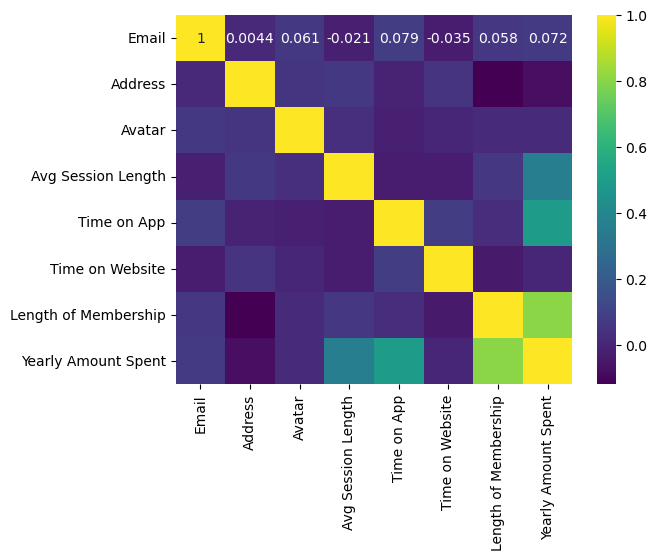

In [30]:

#Heatmap
sns.heatmap(df.corr(),annot=True,cmap='viridis')


### Test and Train Split

In [31]:
# Define x and y
x = df.iloc[:,:-1]
y = df['Yearly Amount Spent']

In [32]:
print(x)
print(y)


     Email  Address  Avatar  Avg Session Length  Time on App  Time on Website  \
0      342      381     132           34.497268    12.655651        39.577668   
1      190      226      25           31.926272    11.109461        37.268959   
2      355      123       6           33.000915    11.330278        37.110597   
3      391       62     114           34.305557    13.717514        36.721283   
4      341       60      80           33.330673    12.795189        37.536653   
..     ...      ...     ...                 ...          ...              ...   
495    291      219     127           33.237660    13.566160        36.417985   
496    262       84     104           34.702529    11.695736        37.190268   
497    104       39      18           32.646777    11.499409        38.332576   
498    103      326     128           33.322501    12.391423        36.840086   
499    188      244      27           33.715981    12.418808        35.771016   

     Length of Membership  

In [33]:

# Split data into training and testing
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [34]:
print(xtest)
print(xtrain)

     Email  Address  Avatar  Avg Session Length  Time on App  Time on Website  \
304     52       18      30           33.914015    12.266504        36.575031   
340    458       33     113           31.816428    14.288015        36.773861   
47     303      205      10           32.726785    12.988510        36.462003   
67      98      315      99           32.805220    11.835476        36.375066   
479     27      268      69           34.606242    11.761884        38.126520   
..     ...      ...     ...                 ...          ...              ...   
11     404      489     130           33.879361    11.584783        37.087926   
192    158       55      68           33.694898    11.202670        35.493964   
92      50      224      19           33.471601    11.662263        36.050241   
221    324      175      20           33.636624    11.236507        37.675021   
110     96      417      58           31.853075    12.149375        37.325334   

     Length of Membership  

In [35]:
print(ytest)
print(ytrain)

304    494.687156
340    501.122492
47     563.672873
67     469.310861
479    402.167122
          ...    
11     522.337405
192    505.119638
92     515.828815
221    591.437736
110    459.285123
Name: Yearly Amount Spent, Length: 100, dtype: float64
238    421.326631
438    392.992256
475    535.321610
58     496.650708
380    527.783790
          ...    
255    524.797628
72     418.150081
396    669.987141
235    501.209173
37     490.738632
Name: Yearly Amount Spent, Length: 400, dtype: float64


### Feature Engineering 

In [36]:
# PPS Method
import ppscore as ps

In [37]:
ps.score(df, x='Time on Website',y = 'Yearly Amount Spent')

{'x': 'Time on Website',
 'y': 'Yearly Amount Spent',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 61.39311878507334,
 'model_score': 86.62762178109577,
 'model': DecisionTreeRegressor()}

In [38]:
feature_sel = ps.matrix(df)
feature_sel

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Email,Email,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Email,Address,0.000000,regression,True,mean absolute error,125.000000,168.340000,DecisionTreeRegressor()
2,Email,Avatar,0.000000,regression,True,mean absolute error,35.744000,48.126000,DecisionTreeRegressor()
3,Email,Avg Session Length,0.000000,regression,True,mean absolute error,0.801646,1.170956,DecisionTreeRegressor()
4,Email,Time on App,0.000000,regression,True,mean absolute error,0.790749,1.137688,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
59,Yearly Amount Spent,Avg Session Length,0.000000,regression,True,mean absolute error,0.801646,1.009167,DecisionTreeRegressor()
60,Yearly Amount Spent,Time on App,0.000000,regression,True,mean absolute error,0.790749,0.940751,DecisionTreeRegressor()
61,Yearly Amount Spent,Time on Website,0.000000,regression,True,mean absolute error,0.801933,1.148275,DecisionTreeRegressor()
62,Yearly Amount Spent,Length of Membership,0.158654,regression,True,mean absolute error,0.768200,0.646322,DecisionTreeRegressor()


In [39]:
feature_sel[feature_sel['y'] =='Yealy Amount Spent']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model


## Model Building 

### Linear Regression 

In [42]:
df.head(2)

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,342,381,132,34.497268,12.655651,39.577668,4.082621,587.951054
1,190,226,25,31.926272,11.109461,37.268959,2.664034,392.204933


In [45]:
import statsmodels.formula.api as smf

In [53]:
model = smf.ols('Yearly_Amount_Spent~Avg_Session_Length+Time_on_App+Length_of_Membership',data=df).fit()

PatsyError: Error evaluating factor: NameError: name 'Time_on_App' is not defined
    Yearly_Amount_Spent~Avg_Session_Length+Time_on_App+Length_of_Membership
                                           ^^^^^^^^^^^